## Importing the Libraries

In [1]:
import numpy as np # To create n dimensional arrays
import pandas as pd # To read and create dataframe for the dataset
import matplotlib.pyplot as plt # To plot the graphs

## Getting the Dataset

In [2]:
# Reading the file
dataset = pd.read_csv('startup_funding.csv', skipinitialspace = True, encoding = 'UTF-8')
df = dataset.copy() # Just a another dataframe to so that we can get back our original dataframe if required

## Taking care of the Discrepancies

In [3]:
# replace function is used to replace data values with another in dataframe, inplace is used to make changes in 
# the original or not
df.InvestmentType.replace('SeedFunding', 'Seed Funding', inplace = True)
df.InvestmentType.replace('Crowd funding', 'Crowd Funding', inplace = True)
df.InvestmentType.replace('PrivateEquity', 'Private Equity', inplace = True)
df.StartupName.replace('Flipkart.com', 'Flipkart', inplace = True)
df.StartupName.replace('Olacabs', 'Ola Cabs',inplace = True)
df.StartupName.replace('OYO Rooms', 'Oyo', inplace = True)
df.StartupName.replace('Oyo Rooms', 'Oyo', inplace = True)
df.StartupName.replace('OyoRooms', 'Oyo', inplace = True)
df.StartupName.replace('Oyorooms', 'Oyo', inplace = True)
df.StartupName.replace('Paytm Marketplace', 'Paytm', inplace = True)

## Solution for the Problem

In [4]:
# Function f() is used to sort the list on the basis of frequency rather than string
def f(x):
    return x[1]
# Since we need to find to the investors having investment type:- Private Equity
cond = df.InvestmentType == 'Private Equity' # Condition
investors = np.array(df.InvestorsName[cond]) # List of all the investors
companies = np.array(df.StartupName[cond]) # List of all the companies
# Since we need to get the list of investors with the list of companies for each investor
# Dictionary is best data structure to handle this problem.
invc = {}
for i in range(len(investors)):
    # Since each row in InvestorName contain more than one investor that's why we need
    # to seperate each investor in using split() function based on the character to seperate
    # as per my observation each investor has been seperated using ', ', ' and ' and ','.
    name1 = str(investors[i]).split(', ')
    for j in range(len(name1)):
        name2 = name1[j].split(' and ')
        for k in range(len(name2)):
            name3 = name2[k].split(',')
            for n in name3:
                # As told above we need to ignore Undisclosed Investor or string is empty
                if n == '' or n == ' ' or n == 'Undisclosed Investors' or n == 'Undisclosed investors':
                    continue
                if n not in invc:
                    invc[n] = [companies[i]]
                else:
                    invc[n].append(companies[i])
# Since we got the Dictionary of investors as key and the list of the companies they have invested as values.
# The list may contain duplicate values and for getting unique values we can use set or np.unique() functionality
# and since we need the no of companies we can use len() functionality to count.
invf = []
for i in invc:
    invf.append([i, len(set(invc[i]))])
# Sort() function used to sort the invfreq list into descending order using reverse = True
# and key is set to function f which returns frequency of each investor so that
# it can be sorted as per frequency rather than string.
invf.sort(key = f, reverse = True)
inv,comp = [],[]
# Storing top 5 investors and their frequency
for i in range(5):
    comp.append(invf[i][0])
    inv.append(invf[i][1])

## Plotting the Bar Graph

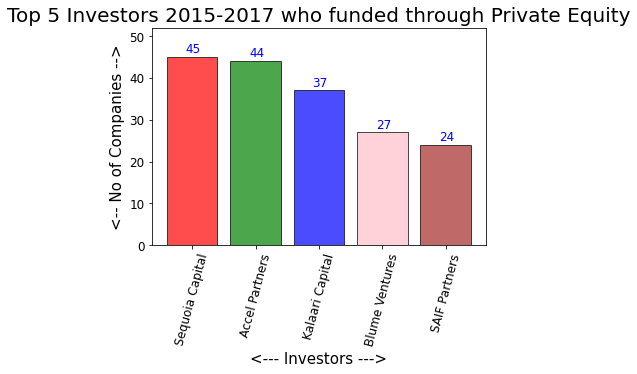

In [5]:
c = ['red','green','blue','pink','brown'] # List of the colors for the bars
# alpha is used to define opacity of the bar color.
plt.bar(comp, inv, edgecolor = 'black', color = c, alpha = 0.7)
# rotation parameter is used so that investors name in the x-axis
# do not coincide
plt.xticks(rotation = 75, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim(0,52)
for i in range(5):
    # text() function is used to write text on the x-y plane of the graph
    plt.text(i-0.1, inv[i]+1, inv[i], fontsize = 12, color = 'blue')
plt.xlabel('<--- Investors --->', fontsize = 15)
plt.ylabel('<-- No of Companies -->', fontsize = 15)
plt.title('Top 5 Investors 2015-2017 who funded through Private Equity', fontsize = 20)
plt.show()